# IMPORTING REQUIRED LIBRARIES

In [178]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import re
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# UPLOADING THE DATA

In [179]:
data=pd.read_csv(r"C:\Users\cshar\OneDrive\Desktop\ML_PROJECT\alldata.csv")

# ANALYSIS OF THE DATA

In [180]:
data.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [181]:
data.tail()

,position,company,description,reviews,location
6959,Data Developer / Machine Learning Analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale, CA"
6960,Scientist I,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA"
6961,Intern Scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale, CA"
6962,Senior Data & Applied Scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale, CA"
6963,"Principal Data Scientist, Deep Learning",Comcast,Comcast’s Technology &amp; Product organizatio...,11610.0,"Sunnyvale, CA 94089"


In [182]:
data.shape

(6964, 5)

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


In [184]:
data.describe()

,reviews
count,5326.000000
mean,3179.089185
std,8448.515056
min,2.000000
25%,27.000000
50%,230.000000
75%,1578.000000
max,148114.000000


In [185]:
data.columns

Index(['position', 'company', 'description', 'reviews', 'location'], dtype='object')

In [186]:
data.nunique()

position       5242
company        2213
description    6708
reviews         560
location        382
dtype: int64

In [187]:
data['position'].unique()

array(['Development Director',
       'An Ostentatiously-Excitable Principal Research Assistant to Chief Scientist',
       'Data Scientist', ..., 'Data Developer / Machine Learning Analyst',
       'Intern Scientist', 'Principal Data Scientist, Deep Learning'],
      dtype=object)

In [188]:
data['company'].unique()

array(['ALS TDI', 'The Hexagon Lavish', 'Xpert Staffing', ..., 'Nexient',
       'Arosys', 'Whiterabbit.ai'], dtype=object)

In [189]:
location=data['location'].value_counts()
top = list(location.index)[:15]
top

['Seattle, WA',
 'New York, NY',
 'Cambridge, MA',
 'Boston, MA',
 'San Francisco, CA',
 'San Diego, CA',
 'Chicago, IL',
 'Boulder, CO',
 'Washington, DC',
 'Sunnyvale, CA',
 'Mountain View, CA',
 'Los Angeles, CA',
 'Austin, TX',
 'Atlanta, GA',
 'Redmond, WA 98052']

In [190]:
reviews = data['reviews'].value_counts()
top = list(reviews.index)[:15]
top

[25902.0,
 108.0,
 2.0,
 5.0,
 4.0,
 4618.0,
 2474.0,
 3.0,
 6.0,
 25895.0,
 7.0,
 705.0,
 91.0,
 8.0,
 15.0]

In [191]:
positions = data['position'].value_counts()
top = list(positions.index)[:100]
top

['Data Scientist',
 'Senior Data Scientist',
 'Research Analyst',
 'Data Engineer',
 'Machine Learning Engineer',
 'Lead Data Scientist',
 'Research Scientist',
 'Sr. Data Scientist',
 'Principal Data Scientist',
 'Software Engineer',
 'Data Analyst',
 'Quantitative Analyst',
 'Product Manager',
 'Scientist',
 'Bioinformatics Scientist',
 'Market Research Analyst',
 'Senior Software Engineer',
 'Machine Learning Scientist',
 'Software Engineer, Machine Learning',
 'Senior Data Engineer',
 'Senior Research Analyst',
 'Software Development Engineer',
 'Senior Scientist',
 'Staff Data Scientist',
 'Associate Scientist',
 'Lead Data Engineer',
 'Student Research Collaboration',
 'Research Associate',
 'Clinical Scientist',
 'Sr. Data Engineer',
 'Senior Machine Learning Scientist',
 'Senior Machine Learning Engineer',
 'Business Analyst',
 'Senior Quantitative Analyst',
 'Senior Software Development Engineer',
 'Research Data Analyst',
 'Director, Data Science',
 'Senior Associate, Data Sc

In [192]:
print(data['position'].value_counts())

Data Scientist                               351
Senior Data Scientist                         96
Research Analyst                              64
Data Engineer                                 60
Machine Learning Engineer                     56
                                            ... 
Vice President of Marketing and Community      1
Sr. eCommerce Marketing Analyst                1
Acquisition Marketing Manager                  1
NAMR Recruiting Lead - Gamma                   1
Principal Data Scientist, Deep Learning        1
Name: position, Length: 5242, dtype: int64


# CLEANING OF THE DATA

In [193]:
data.isnull().any()

position       True
company        True
description    True
reviews        True
location       True
dtype: bool

<AxesSubplot:>

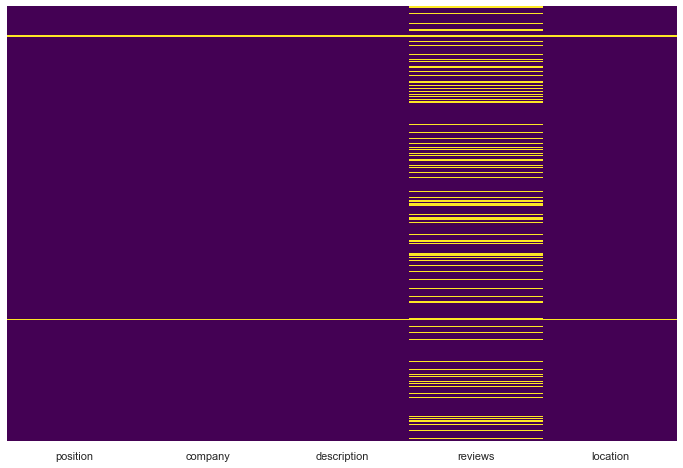

In [194]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [195]:
data.isnull().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [196]:
data["reviews"].fillna(data["reviews"].mode()[0],inplace = True)
data["position"].fillna(data["position"].mode()[0],inplace = True)
data["description"].fillna(data["description"].mode()[0],inplace = True)
data["location"].fillna(data["location"].mode()[0],inplace = True)
data["company"].fillna(data["company"].mode()[0],inplace = True)

In [197]:
data.isnull().any()

position       False
company        False
description    False
reviews        False
location       False
dtype: bool

# VISUALIZING THE DATA

<AxesSubplot:>

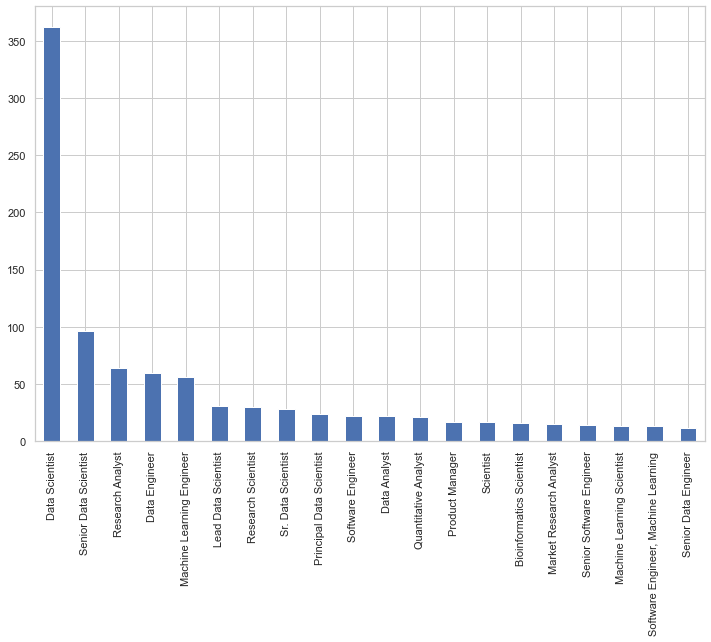

In [198]:
data['position'].value_counts().head(20).plot.bar()

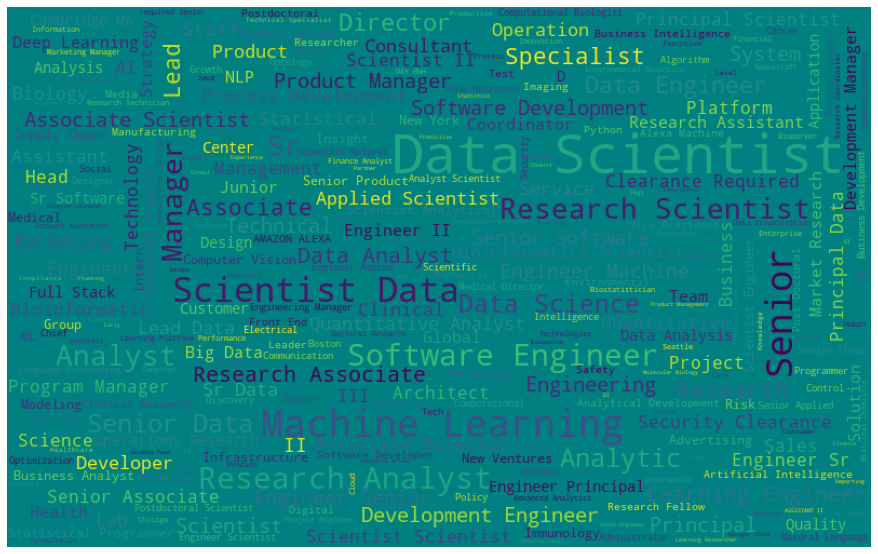

In [199]:
positions_text = " ".join(data['position'].dropna().to_list())
wordcloud = WordCloud( width = 800,height=500,max_font_size=50, max_words=300, background_color="teal").generate(positions_text)
  
# plot the WordCloud image    
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

<AxesSubplot:>

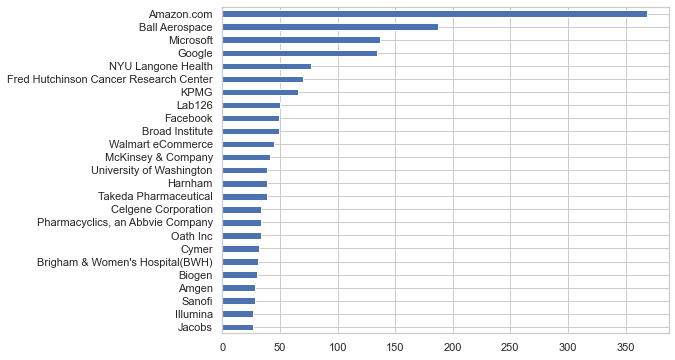

In [200]:
data['company'].value_counts().head(25).sort_values().plot.barh(figsize = (8,6))

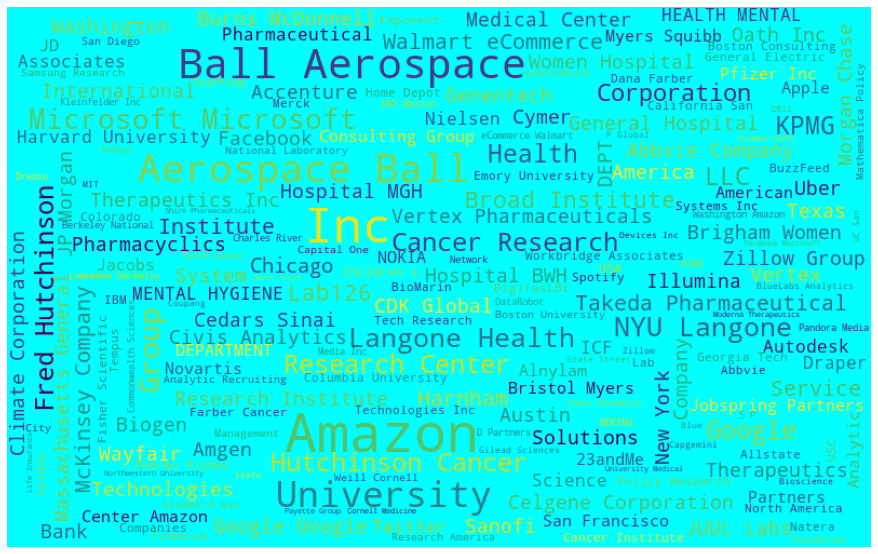

In [201]:
positions_text = " ".join(data['company'].dropna().to_list())
wordcloud = WordCloud(width = 800,height=500,max_font_size=50, max_words=200, background_color="aqua").generate(positions_text)
  
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

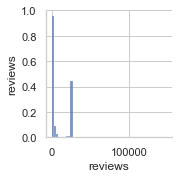

In [202]:
sns.pairplot(data)

Text(0.5, 1.0, 'Boxplot of Position')

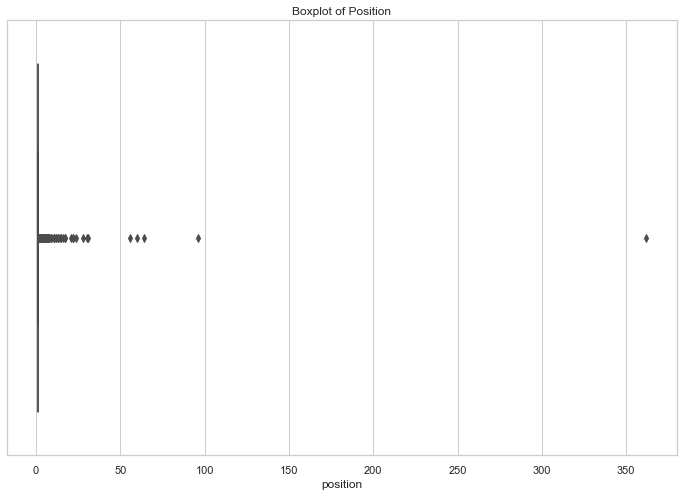

In [203]:
sns.boxplot(x=data['position'].value_counts())
plt.title('Boxplot of Position')

Text(0.5, 1.0, 'Boxplot of Company')

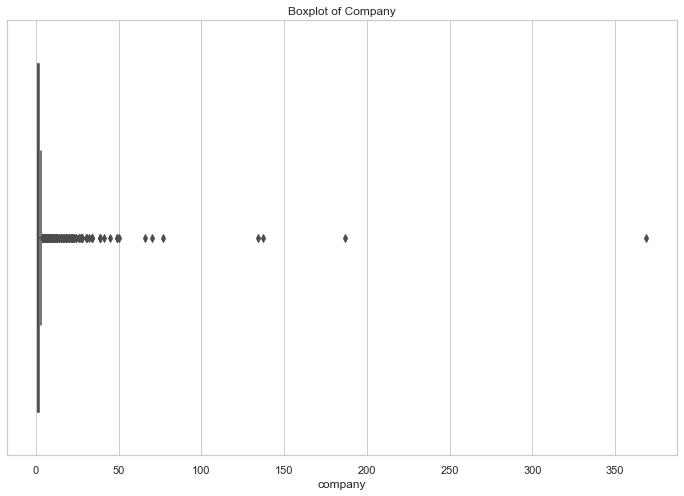

In [204]:
sns.boxplot(x=data['company'].value_counts())
plt.title('Boxplot of Company')

Text(0.5, 1.0, 'Boxplot of Reviews')

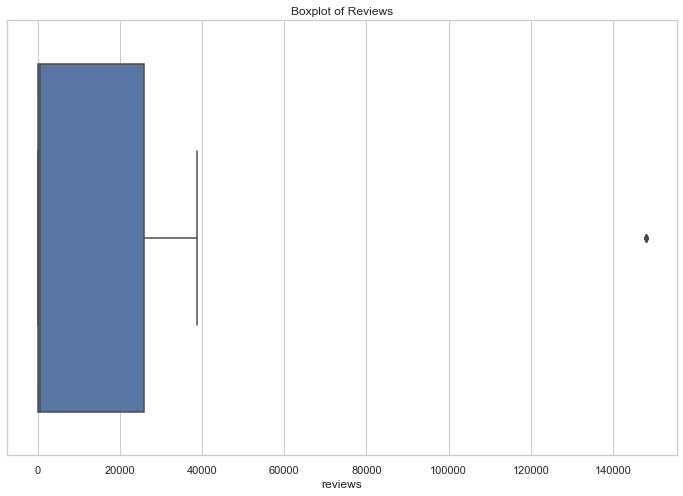

In [205]:
sns.boxplot(x=data['reviews'])
plt.title('Boxplot of Reviews')

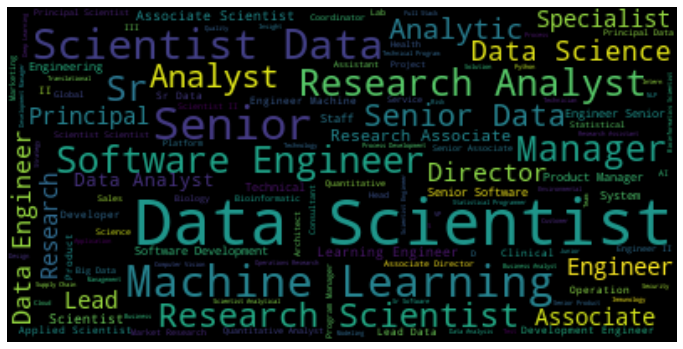

In [206]:
wordcloud = WordCloud().generate(data.position.to_string())

sns.set(rc={'figure.figsize':(12,8)})

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

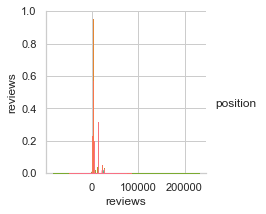

In [207]:
sns.set_style("whitegrid");
sns.pairplot(data, hue="position", height=3);
plt.show()

In [208]:
description = data['position']
description[0]

'Development Director'

# CREATING JOB CLASSIFIER

In [209]:
data2.columns

Index(['position', 'company', 'description', 'reviews', 'location'], dtype='object')

In [210]:
data2.groupby(['position'])['company'].count()

position
Data Analyst                  848
Data Science Manager          781
Data Scientist               2656
Machine Learning Engineer    1384
Others                       1295
Name: company, dtype: int64

In [211]:


#there are so many job profiles in teh given dataset so lets Categories them into 5; Data Scientist, Machine Learning Engineer, Data Analyst, Data Science Manager and Others

# Creating only 5 datascience roles among all
data2 = data.copy()
data2.dropna(subset=['position'], how='all', inplace = True)
data2['position']=[x.upper() for x in data2['position']]
data2['description']=[x.upper() for x in data2['description']]

data2.loc[data2.position.str.contains("SCIENTIST"), 'position'] = 'Data Scientist'

data2.loc[data2.position.str.contains('ENGINEER'),'position']='Machine Learning Engineer'
data2.loc[data2.position.str.contains('PRINCIPAL STATISTICAL PROGRAMMER'),'position']='Machine Learning Engineer'
data2.loc[data2.position.str.contains('PROGRAMMER'),'position']='Machine Learning Engineer'
data2.loc[data2.position.str.contains('DEVELOPER'),'position']='Machine Learning Engineer'

data2.loc[data2.position.str.contains('ANALYST'), 'position'] = 'Data Analyst'
data2.loc[data2.position.str.contains('STATISTICIAN'), 'position'] = 'Data Analyst'

data2.loc[data2.position.str.contains('MANAGER'),'position']='Data Science Manager'
data2.loc[data2.position.str.contains('CONSULTANT'),'position']='Data Science Manager'
data2.loc[data2.position.str.contains('DATA SCIENCE'),'position']='Data Science Manager'
data2.loc[data2.position.str.contains('DIRECTOR'),'position']='Data Science Manager'

data2.position=data2.position[(data2.position == 'Data Scientist') | (data2.position == 'Data Analyst') | (data2.position == 'Machine Learning Engineer') | (data2.position == 'Data Science Manager')]
data2.position=['Others' if x is np.nan else x for x in data2.position]

position=data2.groupby(['position'])['company'].count()   
position=position.reset_index(name='company')
position=position.sort_values(['company'],ascending=False)

print('Here is  the count of each new roles we created :', '\n\n', position)

Here is  the count of each new roles we created : 

                     position  company
2             Data Scientist     2656
3  Machine Learning Engineer     1384
4                     Others     1295
0               Data Analyst      848
1       Data Science Manager      781


In [212]:
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [213]:
# Next Part in ML Algorithm is Data Cleaning
X=data2.description
Y=data2.position
#X=data.description
#Y=data.position


X=[re.sub(r"[^a-zA-Z0-9]+", ' ', k) for k in X]
X=[re.sub("[0-9]+",' ',k) for k in X]

#applying stemmer
ps =PorterStemmer()
X=[ps.stem(k) for k in X]

#Note: I have not removed stop words because there are important key words mentioned in job description which are of length 2, I feel they have weightage while classifing
tfidf=TfidfVectorizer()
label_enc=LabelEncoder()

X=tfidf.fit_transform(X)
Y=label_enc.fit_transform(Y)



x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.3)

In [214]:
#exporting the tfidf encoder
pickle.dump(tfidf, open("tfidf1.pkl", "wb"))


#exporting the label encoder
pickle.dump(label_enc, open('Departure_encoder.pkl', 'wb'))

In [215]:
from sklearn.metrics import accuracy_score

In [216]:
from sklearn.svm import SVC

In [217]:
# #first algorithm SVM
# #SVM classification
svm=SVC()
svm.fit(x_train,y_train)

svm_y=svm.predict(x_test)

print('Accuracy of SVM :', accuracy_score(y_test,svm_y))

Accuracy of SVM : 0.7655502392344498


In [218]:
from sklearn.naive_bayes import MultinomialNB

In [219]:
#Naive Bayes classification
NB=MultinomialNB()
NB.fit(x_train,y_train)
NB_y=NB.predict(x_test)

print('Accuracy of NB :', accuracy_score(y_test,NB_y))

Accuracy of NB : 0.4110047846889952


In [220]:
from sklearn.linear_model import SGDClassifier

In [221]:
#3rd Classifier SGDC
#SGD classification
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
sgd_y=sgd.predict(x_test)

print('Accuracy of SGD :', accuracy_score(y_test,sgd_y))
print ('Confusion Matrix of SGD : ', '\n\n', confusion_matrix(y_test,sgd_y))

#crossfold Validation of 7 folds for SGD
cross_val_SGD=sklearn.model_selection.cross_validate(sgd, x_train, y=y_train,cv=7)

print ('SGD Train fit score is : ', '\n\n', cross_val_SGD ['fit_time'])
print ('SGD TEST score is : ', '\n\n', cross_val_SGD ['test_score'])

Accuracy of SGD : 0.7899521531100478
Confusion Matrix of SGD :  

 [[193   6  34   6  16]
 [  6 151  36  16  25]
 [ 12   9 719  27  30]
 [ 12   3  42 342  16]
 [ 15  26  74  28 246]]
SGD Train fit score is :  

 [0.60338616 0.60238743 0.60937095 0.58842683 0.54055548 0.54853249
 0.56448936]
SGD TEST score is :  

 [0.79626973 0.7661406  0.76436782 0.77729885 0.75       0.76149425
 0.75143678]


In [222]:
y_test

array([0, 3, 3, ..., 2, 1, 3])

In [223]:
with open('clf.pkl', 'wb') as f:
    pickle.dump(sgd, f)